# **Load, inspect and understand the dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('mobile_addiction.csv')
#df.head()
#df.info()

#drop the first column (index colummn)
df.drop(columns=['Unnamed: 0'], inplace=True)
#df.head()
#df.info()

#Getting Target Variables Ready for Preprocessing
df.rename(columns={'addicted': 'addiction_status'}, inplace=True)
df['stress_risk'] = df['stress_level'].apply(lambda x: 'yes' if x >= 6 else 'no')
df.head()

,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,addiction_status,stress_risk
0,5,29,0,0,49,0,44,5,3,35,not addicted,no
1,12,29,1,2,65,1,29,5,9,21,addicted,yes
2,8,28,2,0,57,3,28,7,5,39,addicted,no
3,12,39,2,0,69,1,28,6,8,24,addicted,yes
4,7,37,3,1,64,2,27,4,5,26,addicted,no


# **Data Preprocessing**

In [ ]:
#Convert Target Variables from String to Binary Integers
df['addiction_status'] = df['addiction_status'].map({'addicted': 1, 'not addicted': 0})
df['stress_risk'] = df['stress_risk'].map({'yes': 1, 'no': 0})
df.head()

#Check for missing values in the dataset
df.isnull().sum()


,0
daily_screen_time,0
app_sessions,0
social_media_usage,0
gaming_time,0
notifications,0
night_usage,0
age,0
work_study_hours,0
stress_level,0
apps_installed,0


# **Evaluating Features**

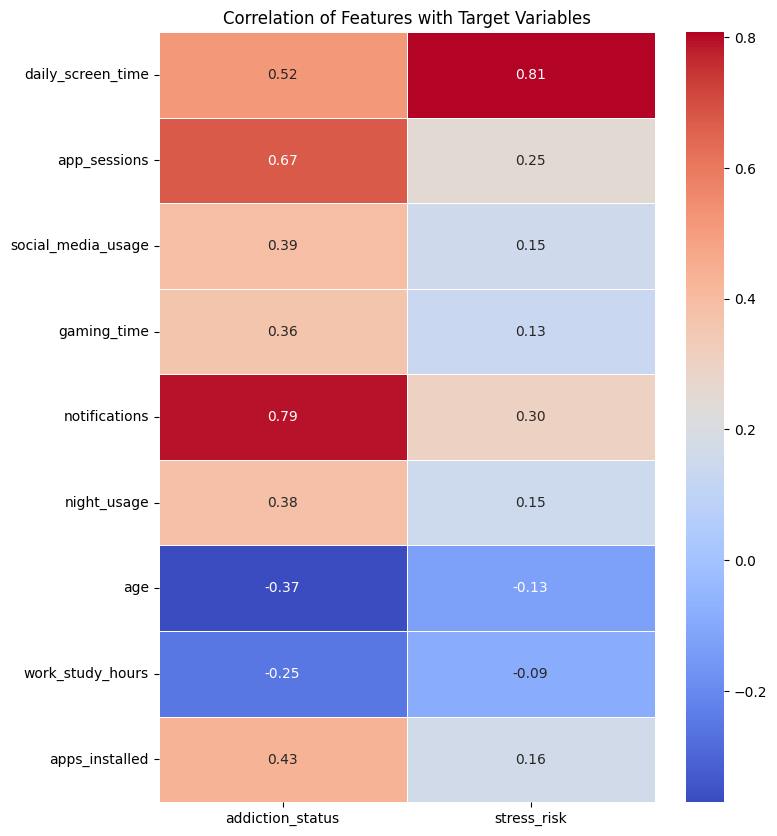

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Create a heat map of correlations between all features and the target variables
corr_matrix = df.corr()
corr_targets = corr_matrix[['addiction_status', 'stress_risk']].drop(['addiction_status', 'stress_risk', 'stress_level'])
plt.figure(figsize=(8, 10))
sns.heatmap(corr_targets, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Features with Target Variables')
plt.show()

#This helped in evaluating which features to include in training the model and which features to drop

# **Visualize Relations between target variables and important features**

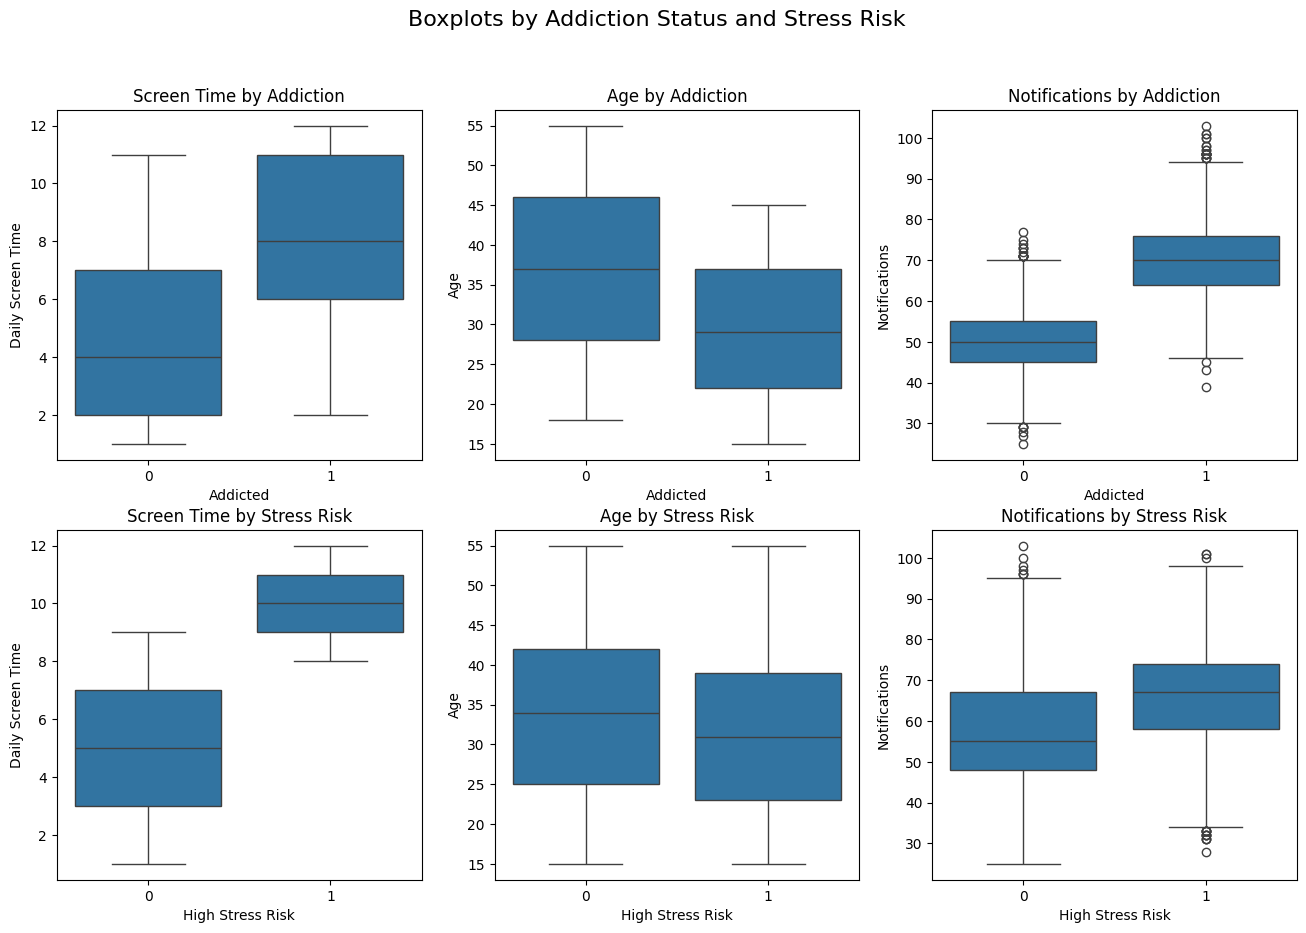

In [ ]:
#BoxPlots
# Set up a subplot grid to display all plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.suptitle("Boxplots by Addiction Status and Stress Risk", fontsize=16)

# Row 1: addiction_status
# vs Daily Screen Time
sns.boxplot(ax=axes[0, 0], x='addiction_status', y='daily_screen_time', data=df)
axes[0, 0].set_title("Screen Time by Addiction")
axes[0, 0].set_xlabel("Addicted")
axes[0, 0].set_ylabel("Daily Screen Time")

# vs Age
sns.boxplot(ax=axes[0, 1], x='addiction_status', y='age', data=df)
axes[0, 1].set_title("Age by Addiction")
axes[0, 1].set_xlabel("Addicted")
axes[0, 1].set_ylabel("Age")

# vs Notifications
sns.boxplot(ax=axes[0, 2], x='addiction_status', y='notifications', data=df)
axes[0, 2].set_title("Notifications by Addiction")
axes[0, 2].set_xlabel("Addicted")
axes[0, 2].set_ylabel("Notifications")

# Row 2: stress_risk
# vs Daily Screen Time
sns.boxplot(ax=axes[1, 0], x='stress_risk', y='daily_screen_time', data=df)
axes[1, 0].set_title("Screen Time by Stress Risk")
axes[1, 0].set_xlabel("High Stress Risk")
axes[1, 0].set_ylabel("Daily Screen Time")

# vs Age
sns.boxplot(ax=axes[1, 1], x='stress_risk', y='age', data=df)
axes[1, 1].set_title("Age by Stress Risk")
axes[1, 1].set_xlabel("High Stress Risk")
axes[1, 1].set_ylabel("Age")

# vs Notifications
sns.boxplot(ax=axes[1, 2], x='stress_risk', y='notifications', data=df)
axes[1, 2].set_title("Notifications by Stress Risk")
axes[1, 2].set_xlabel("High Stress Risk")
axes[1, 2].set_ylabel("Notifications")

plt.show()




# **Scaling and splitting the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Scaling the features
scaler = StandardScaler()

features = ['daily_screen_time','notifications', 'age']

x = df[features]
y1 = df['addiction_status']
y2 = df['stress_risk']

x_scaled = scaler.fit_transform(x)

print(x.shape, y1.shape)
print(x.shape, y2.shape)

#splitting the data
x_train, x_test, y1_train, y1_test = train_test_split(x_scaled, y1, test_size=0.2, random_state=42)
x_train, x_test, y2_train, y2_test = train_test_split(x_scaled, y2, test_size=0.2, random_state=42)


(13589, 3) (13589,)
(13589, 3) (13589,)


# **Train the Logistic Regression Model to Classify if the user is Addicted or Not Addicted**

In [ ]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Model for Addiction Status
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y1_train)

y1_pred = logreg_model.predict(x_test)

# **Evaluate the model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("\nEvaluation for Logistic Regression Model:\n")
cm = confusion_matrix(y1_test, y1_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Actual: Not Addicted', 'Actual: Addicted'],
    columns=['Predicted: Not Addicted', 'Predicted: Addicted']
)
print("Confusion Matrix:")
print('----------------------------------------------------------------')
print(cm_df)
print('----------------------------------------------------------------\n')
print("Accuracy:\t", accuracy_score(y1_test, y1_pred))
print("Precision:\t", precision_score(y1_test, y1_pred))
print("Recall:\t\t", recall_score(y1_test, y1_pred))
print("F1 Score:\t", f1_score(y1_test, y1_pred))




Evaluation for Logistic Regression Model:

Confusion Matrix:
----------------------------------------------------------------
                      Predicted: Not Addicted  Predicted: Addicted
Actual: Not Addicted                     1235                  101
Actual: Addicted                           90                 1292
----------------------------------------------------------------

Accuracy:	 0.9297277409860192
Precision:	 0.927494615936827
Recall:		 0.934876989869754
F1 Score:	 0.9311711711711712


# **Visualize using ROC Curve**

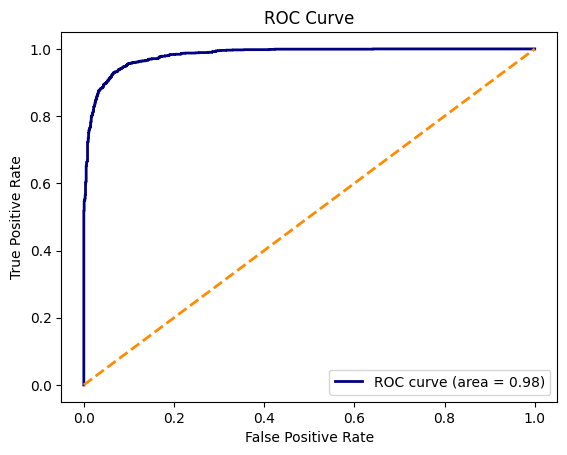

In [ ]:
##plot the ROC Curve
from sklearn.metrics import roc_curve, auc

y_score = logreg_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y1_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **Train the KNN Model to Classify if the user is at high stress risks or low stress risks**

In [ ]:
##train the KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y2_train)

y2_pred = knn_model.predict(x_test)

# **Evaluate the Model**

In [ ]:
cm = confusion_matrix(y2_test, y2_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Actual: Low Risk', 'Actual: High Risk'],
    columns=['Predicted: Low Risk', 'Predicted: High Risk']
)
print("Confusion Matrix:")
print('----------------------------------------------------------------')
print(cm_df)
print('----------------------------------------------------------------\n')
print("Accuracy:\t", accuracy_score(y2_test, y2_pred))
print("Precision:\t", precision_score(y2_test, y2_pred))
print("Recall:\t\t", recall_score(y2_test, y2_pred))
print("F1 Score:\t", f1_score(y2_test, y2_pred))

Confusion Matrix:
----------------------------------------------------------------
                   Predicted: Low Risk  Predicted: High Risk
Actual: Low Risk                  1840                     7
Actual: High Risk                   18                   853
----------------------------------------------------------------

Accuracy:	 0.9908020603384842
Precision:	 0.9918604651162791
Recall:		 0.9793340987370838
F1 Score:	 0.9855574812247256


# **Visualize using ROC Curve**

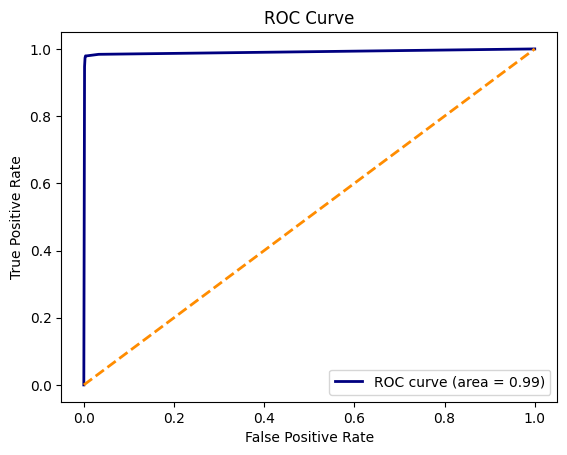

In [ ]:
y2_score = knn_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y2_test, y2_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import joblib

joblib.dump(logreg_model, 'logreg_model.pkl')
joblib.dump(knn_model, 'knn_model.pkl')

from google.colab import files
files.download('logreg_model.pkl')
files.download('knn_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>